In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

Data PreProcessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
data.value_counts(data.duplicated())

False    398
dtype: int64

In [9]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [12]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [13]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


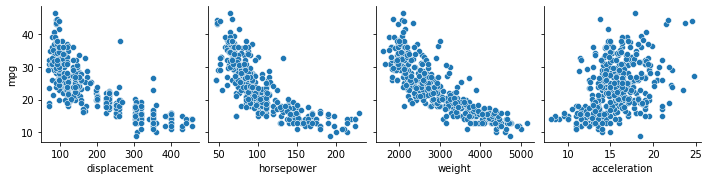

In [23]:
sb.pairplot(data,x_vars=data.iloc[:,[2,3,4,5]],y_vars='mpg')

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

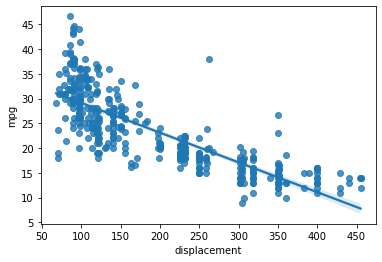

In [37]:
sb.regplot(x='displacement',y='mpg',data=data)

Defining targer variable y and feature x

In [25]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [63]:
X=data.iloc[:,[2,3,4,5]]
Y=data.mpg

In [64]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
S=StandardScaler()

In [35]:
X=S.fit_transform(X)

In [36]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [67]:
pd.DataFrame(X).describe()

,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000
mean,194.411990,104.469388,2977.584184,15.541327
std,104.644004,38.491160,849.402560,2.758864
min,68.000000,46.000000,1613.000000,8.000000
25%,105.000000,75.000000,2225.250000,13.775000
50%,151.000000,93.500000,2803.500000,15.500000
75%,275.750000,126.000000,3614.750000,17.025000
max,455.000000,230.000000,5140.000000,24.800000


Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model=LinearRegression()

In [70]:
model.fit(x_train,y_train)

LinearRegression()

In [71]:
y_predict=model.predict(x_test)

In [72]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error

In [73]:
r2_score(y_test,y_predict)

0.7403354941539135

In [74]:
mean_absolute_error(y_test,y_predict)

3.0620303182537807

In [75]:
mean_absolute_percentage_error(y_test,y_predict)

0.13804298046019484

In [76]:
model.coef_

array([-0.00707688, -0.04118295, -0.0051319 ,  0.01923512])

In [77]:
model.intercept_

44.03073428326683

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
poly=PolynomialFeatures(degree=2)

In [80]:
x_train2=poly.fit_transform(x_train)

In [81]:
x_test2=poly.fit_transform(x_test)

In [82]:
model.fit(x_train2,y_train)

LinearRegression()

In [83]:
model.intercept_

110.41430225427227

In [84]:
model.coef_

array([ 0.00000000e+00, -9.80013063e-02, -2.81355579e-01, -1.04124256e-02,
       -4.60019807e+00, -2.62822673e-04,  9.80945142e-04,  4.37477473e-05,
       -3.70739687e-03, -1.35726186e-03,  8.06317094e-05,  4.11885196e-04,
       -3.81207338e-06,  9.48426414e-04,  6.94235547e-02])

In [85]:
y2_predict=model.predict(x_test2)

In [86]:
r2_score(y_test,y2_predict)

0.7286285925639217